In [1]:
import math as ma
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.backend import categorical_crossentropy

In [2]:
create_data=[]
for i in range(0,180,2):
    array=[]
    for j in range(0,200,2):
        k=180-i-j
        x=50*ma.cos(ma.radians(i))+40*ma.cos(ma.radians(i+j))+30*ma.cos(ma.radians(i+j+k))
        y=50*ma.sin(ma.radians(i))+40*ma.sin(ma.radians(i+j))+30*ma.sin(ma.radians(i+j+k))
        array.append(np.array((i,j,k,x,y)))
    create_data.extend(array)

In [3]:
header = ['alpha', 'beta', 'sigma' ,'x', 'y']
with open('robot_3d.csv', 'w', encoding='UTF8', newline='') as data_table:
    viet = csv.writer(data_table)
    viet.writerow(header)
    viet.writerows(create_data)

In [4]:
data=pd.read_csv('robot_3d.csv')
data

,alpha,beta,sigma,x,y
0,0.0,0.0,180.0,60.000000,3.673940e-15
1,0.0,2.0,178.0,59.975633,1.395980e+00
2,0.0,4.0,176.0,59.902562,2.790259e+00
3,0.0,6.0,174.0,59.780876,4.181139e+00
4,0.0,8.0,172.0,59.610723,5.566924e+00
...,...,...,...,...,...
8995,178.0,190.0,-188.0,-40.358819,7.311899e+00
8996,178.0,192.0,-190.0,-40.577231,8.690902e+00
8997,178.0,194.0,-192.0,-40.843637,1.006144e+01
8998,178.0,196.0,-194.0,-41.157712,1.142185e+01


In [5]:
x_data=np.array(data.drop(['alpha','beta','sigma'],axis=1))
y_data=np.array(data[['alpha','beta','sigma']])
y_data.shape

(9000, 3)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1)
x_train.shape

(8100, 2)

In [7]:
model=Sequential()
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3,  activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 11,411
Trainable params: 11,411
Non-traina

In [8]:
model.compile(loss='mse',optimizer=Adam(),metrics=['mean_absolute_error'])
history=model.fit(x_train,y_train,batch_size=200,epochs=1000,verbose=1, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=30)]) 

Epoch 1/1000
33/33 [==============================] - 2s 22ms/step - loss: 7244.3940 - mean_absolute_error: 67.6931 - val_loss: 5430.6616 - val_mean_absolute_error: 56.9590
Epoch 2/1000
33/33 [==============================] - 0s 7ms/step - loss: 4738.0479 - mean_absolute_error: 49.5424 - val_loss: 4446.8892 - val_mean_absolute_error: 46.7607
Epoch 3/1000
33/33 [==============================] - 0s 8ms/step - loss: 3993.1426 - mean_absolute_error: 43.6286 - val_loss: 3800.4651 - val_mean_absolute_error: 42.6931
Epoch 4/1000
33/33 [==============================] - 0s 7ms/step - loss: 3509.1387 - mean_absolute_error: 40.9816 - val_loss: 3562.0908 - val_mean_absolute_error: 41.4010
Epoch 5/1000
33/33 [==============================] - 0s 8ms/step - loss: 3433.5103 - mean_absolute_error: 40.3840 - val_loss: 3525.2219 - val_mean_absolute_error: 40.6827
Epoch 6/1000
33/33 [==============================] - 0s 9ms/step - loss: 3405.3770 - mean_absolute_error: 40.1521 - val_loss: 3504.2102 - 

In [9]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test mae:',score[1])

Test loss: 132.7602996826172
Test mae: 5.419647693634033


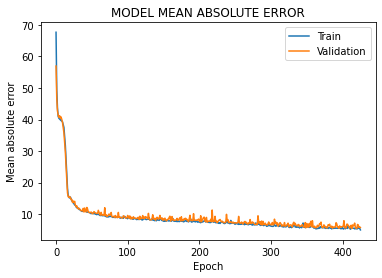

In [10]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('MODEL MEAN ABSOLUTE ERROR')
plt.ylabel('Mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

In [11]:
y_pred=model.predict(x_test)

In [12]:
y_pred[300]

array([126.85207, 147.87344, -94.57419], dtype=float32)

In [13]:
y_test[300]

array([126., 146., -92.])